## Data analysis about cifar100 dataset about different power level and performence

In [49]:
import numpy as np
import os
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from ptflops import get_model_complexity_info

### This part is analying the energy consumption

In [50]:
# show the path of the current directory
curPath = os.getcwd()
print(curPath)
# show the parent directory of the current directory
parentPath = os.path.abspath(os.path.join(curPath, os.pardir))
print(parentPath)
# the data path is in the parentPath/Data/alexnet/cifar100
dataPath = os.path.join(parentPath, 'Data/alexnet/cifar100')
# show all the folders in the data path
print(os.listdir(dataPath))
# select all the fodlers with the name containing 'Power'
folderList = [f for f in os.listdir(dataPath) if 'Power' in f]
print(folderList)
# reorder the folder list according to the number in the folder name
folderList.sort(key=lambda x: int(x[-2:]))


/Users/dtjgp/Learning/GreenAI/PVWatts/code
/Users/dtjgp/Learning/GreenAI/PVWatts
['Power95', 'Power50', 'Power60', 'Power45', 'Power80', 'Power75', 'Power65', 'Power55', 'Power90', 'Power70', 'Power85', 'Power40']
['Power95', 'Power50', 'Power60', 'Power45', 'Power80', 'Power75', 'Power65', 'Power55', 'Power90', 'Power70', 'Power85', 'Power40']


In [51]:
def load_data_from_folder(folder_name):
    folderPath = os.path.join(dataPath, folder_name)
    print(folderPath)
    print(os.listdir(folderPath))
    
    TrainTime = np.load(os.path.join(folderPath, 'Train_time.npy'), allow_pickle=True)
    # print('The TrainTime data of each epoch are: ', TrainTime)
    
    LayersTime = np.load(os.path.join(folderPath, 'Layers_time.npy'), allow_pickle=True)
    # print('The LayersTime of each epoch are: ', LayersTime)
    
    EpochTime = np.load(os.path.join(folderPath, 'Epoch_time.npy'), allow_pickle=True)
    # print('Each epoch running time are: ', EpochTime)
    
    perSecondEnergy = np.load(os.path.join(folderPath, 'Epoch_energy.npy'), allow_pickle=True)
    # print('The energy consumption of each batch in each epoch are: ', perSecondEnergy)
    
    TrainAccuracy = np.load(os.path.join(folderPath, 'Train_acc.npy'), allow_pickle=True)
    # print('The training accuracy of each epoch are: ', TrainAccuracy)
    
    TestAccuracy = np.load(os.path.join(folderPath, 'Test_acc.npy'), allow_pickle=True)
    # print('The test accuracy of each epoch are: ', TestAccuracy)
    
    return TrainTime, LayersTime, EpochTime, perSecondEnergy, TrainAccuracy, TestAccuracy

print(folderList)
TrainTime_40, LayersTime_40, EpochTime_40, perSecondEnergy_40, TrainAccuracy_40, TestAccuracy_40 = load_data_from_folder(folderList[0])
TrainTime_45, LayersTime_45, EpochTime_45, perSecondEnergy_45, TrainAccuracy_45, TestAccuracy_45 = load_data_from_folder(folderList[1])
TrainTime_50, LayersTime_50, EpochTime_50, perSecondEnergy_50, TrainAccuracy_50, TestAccuracy_50 = load_data_from_folder(folderList[2])
TrainTime_55, LayersTime_55, EpochTime_55, perSecondEnergy_55, TrainAccuracy_55, TestAccuracy_55 = load_data_from_folder(folderList[3])
TrainTime_60, LayersTime_60, EpochTime_60, perSecondEnergy_60, TrainAccuracy_60, TestAccuracy_60 = load_data_from_folder(folderList[4])
TrainTime_65, LayersTime_65, EpochTime_65, perSecondEnergy_65, TrainAccuracy_65, TestAccuracy_65 = load_data_from_folder(folderList[5])
TrainTime_70, LayersTime_70, EpochTime_70, perSecondEnergy_70, TrainAccuracy_70, TestAccuracy_70 = load_data_from_folder(folderList[6])
TrainTime_75, LayersTime_75, EpochTime_75, perSecondEnergy_75, TrainAccuracy_75, TestAccuracy_75 = load_data_from_folder(folderList[7])
TrainTime_80, LayersTime_80, EpochTime_80, perSecondEnergy_80, TrainAccuracy_80, TestAccuracy_80 = load_data_from_folder(folderList[8])
TrainTime_85, LayersTime_85, EpochTime_85, perSecondEnergy_85, TrainAccuracy_85, TestAccuracy_85 = load_data_from_folder(folderList[9])
TrainTime_90, LayersTime_90, EpochTime_90, perSecondEnergy_90, TrainAccuracy_90, TestAccuracy_90 = load_data_from_folder(folderList[10])
TrainTime_95, LayersTime_95, EpochTime_95, perSecondEnergy_95, TrainAccuracy_95, TestAccuracy_95 = load_data_from_folder(folderList[11])

['Power40', 'Power45', 'Power50', 'Power55', 'Power60', 'Power65', 'Power70', 'Power75', 'Power80', 'Power85', 'Power90', 'Power95']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power40
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power45
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power50
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power55
['Train_time.npy', 'Layers_time.npy', 'Train_part_time.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Train_acc.npy', 'Test_acc.npy']
/Users/dtjgp/Learning/GreenAI/PVWatts/Data/alexnet/cifar100/Power60

In [52]:
# this part is just to show the data distribution of the first epoch
print('The number of the epochs are: ', len(TrainTime_40))
print('The Train Energy data of the first epoch in power level 40 are: ', perSecondEnergy_40[0])
print('The Train Energy data of the last epoch in power level 40 are: ', perSecondEnergy_40[-1])
print('The Train Energy data of the first epoch in power level 45 are: ', perSecondEnergy_45[0])
print('The Train Energy data of the last epoch in power level 45 are: ', perSecondEnergy_45[-1])
print('The Train Energy data of the first epoch in power level 50 are: ', perSecondEnergy_50[0])
print('The Train Energy data of the last epoch in power level 50 are: ', perSecondEnergy_50[-1])

The number of the epochs are:  5
The Train Energy data of the first epoch in power level 40 are:  [array([25.12, 31.14, 39.57, 39.32, 39.26, 39.28, 39.54, 39.04, 39.43,
        39.02, 39.49, 39.54, 39.09, 39.45, 39.33, 39.34, 39.33, 39.35,
        39.32, 39.3 , 39.31, 39.3 , 38.97, 39.64, 39.35, 39.27, 39.22,
        39.54, 39.25, 39.42, 39.36, 39.18, 39.48, 39.47, 39.29, 38.89,
        39.32, 39.47, 39.38, 38.84, 39.38, 39.45, 39.29, 38.85, 39.54,
        39.4 , 39.34, 38.83, 39.51, 39.41, 39.42, 39.35, 39.14, 39.34,
        39.03, 39.6 , 39.31, 39.51, 39.17, 34.52, 38.51, 38.42, 38.26,
        37.89])                                                       ]
The Train Energy data of the last epoch in power level 40 are:  [array([38.41, 38.29, 39.08, 39.72, 39.55, 39.5 , 39.27, 39.53, 39.74,
        39.6 , 39.3 , 39.71, 39.53, 39.27, 39.37, 39.46, 39.74, 39.47,
        39.17, 39.47, 39.3 , 39.73, 39.6 , 39.19, 39.42, 39.32, 39.63,
        39.5 , 39.39, 39.53, 39.7 , 39.53, 39.32, 39.56,

### 该数据集为 cifar100, 所以在这个数据集下,所以对于数据的分析集中于数据的能耗和时间  
    1. 数据的内容主要包括每个 epoch 的运行时长以及能耗数据,并且对于每个能耗上限的设置下,只运行了 5 个 epoch

#### average train time per epoch and different power levels

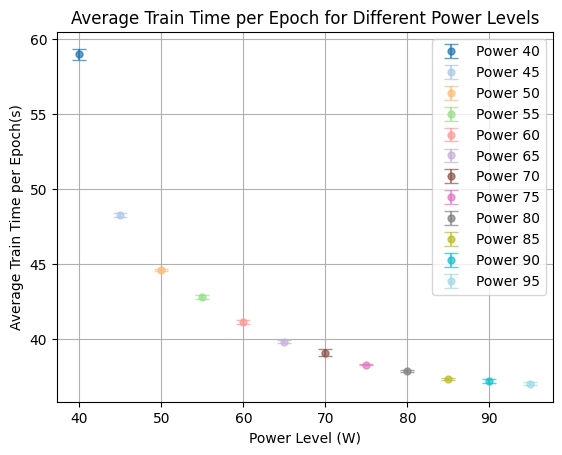

In [53]:
# Plot the average TrainTime for each power level with error bars
# Define the power levels and corresponding average TrainTime and standard deviation
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
average_train_times = [np.mean(TrainTime_40), np.mean(TrainTime_45), np.mean(TrainTime_50), np.mean(TrainTime_55), np.mean(TrainTime_60), np.mean(TrainTime_65), np.mean(TrainTime_70), np.mean(TrainTime_75), np.mean(TrainTime_80), np.mean(TrainTime_85), np.mean(TrainTime_90), np.mean(TrainTime_95)]
std_train_times = [np.std(TrainTime_40), np.std(TrainTime_45), np.std(TrainTime_50), np.std(TrainTime_55), np.std(TrainTime_60), np.std(TrainTime_65), np.std(TrainTime_70), np.std(TrainTime_75), np.std(TrainTime_80), np.std(TrainTime_85), np.std(TrainTime_90), np.std(TrainTime_95)]

# Define colors for each power level with more distinct separation
colors = plt.cm.tab20(np.linspace(0, 1, len(power_levels)))

# Plot the average TrainTime for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_train_times[i], yerr=std_train_times[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Train Time per Epoch(s)')
plt.title('Average Train Time per Epoch for Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()


#### average epoch time and different power levels

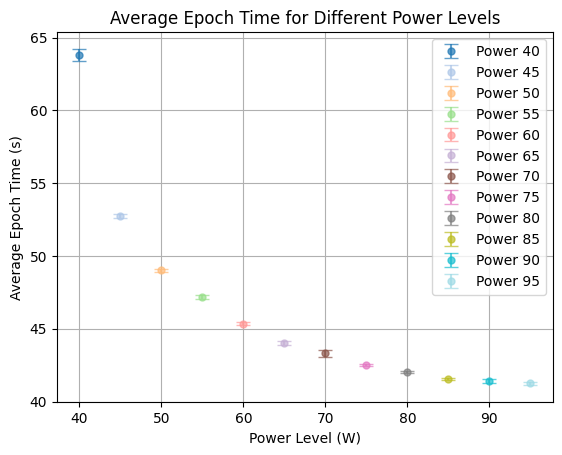

In [54]:
# Define the power levels and corresponding average EpochTime and standard deviation
average_epoch_times = [np.mean(EpochTime_40), np.mean(EpochTime_45), np.mean(EpochTime_50), np.mean(EpochTime_55), np.mean(EpochTime_60), np.mean(EpochTime_65), np.mean(EpochTime_70), np.mean(EpochTime_75), np.mean(EpochTime_80), np.mean(EpochTime_85), np.mean(EpochTime_90), np.mean(EpochTime_95)]
std_epoch_times = [np.std(EpochTime_40), np.std(EpochTime_45), np.std(EpochTime_50), np.std(EpochTime_55), np.std(EpochTime_60), np.std(EpochTime_65), np.std(EpochTime_70), np.std(EpochTime_75), np.std(EpochTime_80), np.std(EpochTime_85), np.std(EpochTime_90), np.std(EpochTime_95)]

# Plot the average EpochTime for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_epoch_times[i], yerr=std_epoch_times[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Epoch Time (s)')
plt.title('Average Epoch Time for Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

#### energy consumption per epoch and different power levels

In [55]:
# print the shape of the perSecondEnergy_40
print(perSecondEnergy_40.shape)
print(perSecondEnergy_40)

(5, 1)
[[array([25.12, 31.14, 39.57, 39.32, 39.26, 39.28, 39.54, 39.04, 39.43,
         39.02, 39.49, 39.54, 39.09, 39.45, 39.33, 39.34, 39.33, 39.35,
         39.32, 39.3 , 39.31, 39.3 , 38.97, 39.64, 39.35, 39.27, 39.22,
         39.54, 39.25, 39.42, 39.36, 39.18, 39.48, 39.47, 39.29, 38.89,
         39.32, 39.47, 39.38, 38.84, 39.38, 39.45, 39.29, 38.85, 39.54,
         39.4 , 39.34, 38.83, 39.51, 39.41, 39.42, 39.35, 39.14, 39.34,
         39.03, 39.6 , 39.31, 39.51, 39.17, 34.52, 38.51, 38.42, 38.26,
         37.89])                                                       ]
 [array([37.62, 36.6 , 39.03, 39.54, 39.29, 39.16, 39.06, 39.44, 39.41,
         39.48, 39.32, 39.4 , 39.01, 39.04, 39.41, 38.96, 39.18, 39.38,
         39.06, 39.21, 39.45, 39.  , 39.04, 39.48, 38.99, 39.18, 39.42,
         39.09, 39.12, 39.46, 38.98, 39.19, 39.44, 39.08, 39.27, 39.49,
         39.11, 39.14, 39.48, 39.01, 39.13, 39.48, 39.13, 39.24, 39.38,
         39.15, 39.29, 39.47, 39.09, 39.21, 39.55, 39.12

In [56]:
# # show the time consumed of each epoch
# for i in range(len(perSecondEnergy_40)):
#     epcohi = perSecondEnergy_40[i][0]
#     print('The time consumed of each batch in epoch ', i, ' is: ', len(epcohi))

# create several ndarray to store the average perSecondEnergy of each power level
AvgperSecondEnergy_40, AvgperSecondEnergy_45, AvgperSecondEnergy_50, AvgperSecondEnergy_55, AvgperSecondEnergy_60 = np.zeros(len(perSecondEnergy_40)), np.zeros(len(perSecondEnergy_45)), np.zeros(len(perSecondEnergy_50)), np.zeros(len(perSecondEnergy_55)), np.zeros(len(perSecondEnergy_60))
AvgperSecondEnergy_65, AvgperSecondEnergy_70, AvgperSecondEnergy_75, AvgperSecondEnergy_80, AvgperSecondEnergy_85 = np.zeros(len(perSecondEnergy_65)), np.zeros(len(perSecondEnergy_70)), np.zeros(len(perSecondEnergy_75)), np.zeros(len(perSecondEnergy_80)), np.zeros(len(perSecondEnergy_85))
AvgperSecondEnergy_90, AvgperSecondEnergy_95 = np.zeros(len(perSecondEnergy_90)), np.zeros(len(perSecondEnergy_95))

# create several ndarray to store the total energy consumption of each power level
EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60 = np.zeros(len(perSecondEnergy_40)), np.zeros(len(perSecondEnergy_45)), np.zeros(len(perSecondEnergy_50)), np.zeros(len(perSecondEnergy_55)), np.zeros(len(perSecondEnergy_60))
EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80, EpochEnergy_85 = np.zeros(len(perSecondEnergy_65)), np.zeros(len(perSecondEnergy_70)), np.zeros(len(perSecondEnergy_75)), np.zeros(len(perSecondEnergy_80)), np.zeros(len(perSecondEnergy_85))
EpochEnergy_90, EpochEnergy_95 = np.zeros(len(perSecondEnergy_90)), np.zeros(len(perSecondEnergy_95))

perSecondEnergyList = [perSecondEnergy_40, perSecondEnergy_45, perSecondEnergy_50, perSecondEnergy_55, perSecondEnergy_60, perSecondEnergy_65, perSecondEnergy_70, perSecondEnergy_75, perSecondEnergy_80,\
                    perSecondEnergy_85, perSecondEnergy_90, perSecondEnergy_95]
PowerLevelList = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
AvgperSecondEnergyList = [AvgperSecondEnergy_40, AvgperSecondEnergy_45, AvgperSecondEnergy_50, AvgperSecondEnergy_55, AvgperSecondEnergy_60, AvgperSecondEnergy_65, AvgperSecondEnergy_70, AvgperSecondEnergy_75, AvgperSecondEnergy_80,\
                      AvgperSecondEnergy_85, AvgperSecondEnergy_90, AvgperSecondEnergy_95]
EpochEnergyList = [EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60, EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80,\
                     EpochEnergy_85, EpochEnergy_90, EpochEnergy_95]


for i in range(len(perSecondEnergyList)):
    perSecondEnergyi = perSecondEnergyList[i]
    PowerLeveli = PowerLevelList[i]
    for j in range(len(perSecondEnergyi)):
        epochi = perSecondEnergyi[j]
        epochi = np.array(epochi[0])
        print(f'The time consumed of each epoch in power level {PowerLeveli} is: {len(epochi)}')
        AvgEnergySecondEpochi = np.round(np.mean(epochi), 2)
        AllEnergyEpochi = np.round(np.sum(epochi), 2)
        print(f'The average energy consumption per second in power level {PowerLeveli} is: {AvgEnergySecondEpochi}')
        print(f'The total energy consumption in power level {PowerLeveli} is: {AllEnergyEpochi}')
        AvgperSecondEnergyList[i][j] = AvgEnergySecondEpochi
        EpochEnergyList[i][j] = AllEnergyEpochi
    print('*' * 50)

The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 38.82
The total energy consumption in power level 40 is: 2484.68
The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 39.06
The total energy consumption in power level 40 is: 2499.56
The time consumed of each epoch in power level 40 is: 64
The average energy consumption per second in power level 40 is: 39.24
The total energy consumption in power level 40 is: 2511.06
The time consumed of each epoch in power level 40 is: 65
The average energy consumption per second in power level 40 is: 39.3
The total energy consumption in power level 40 is: 2554.35
The time consumed of each epoch in power level 40 is: 65
The average energy consumption per second in power level 40 is: 39.27
The total energy consumption in power level 40 is: 2552.74
**************************************************
The time consumed of

In [57]:
import pandas as pd
EpochEnergyList
# transfro the data into a dataframe
df = pd.DataFrame(EpochEnergyList, index=PowerLevelList)
df = df.T
df

,40,45,50,55,60,65,70,75,80,85,90,95
0,2484.68,2293.58,2361.83,2521.42,2637.06,2727.37,2814.70,3005.57,3136.16,3199.12,3375.56,3508.64
1,2499.56,2316.04,2391.29,2515.51,2678.95,2777.26,2923.30,3062.16,3115.09,3254.70,3419.04,3566.64
2,2511.06,2311.90,2392.38,2566.40,2682.55,2835.80,2913.78,3058.53,3116.86,3266.25,3421.27,3574.12
3,2554.35,2314.68,2388.51,2568.15,2685.02,2834.85,2896.08,3064.68,3191.28,3271.43,3431.12,3578.94
4,2552.74,2316.28,2440.90,2570.02,2685.40,2834.13,2924.31,3063.21,3123.01,3277.62,3436.59,3581.04


##### average energy consumption and different power levels

In [58]:
# save the data into a csv file, and do not save the index
# define the path
savePath = os.path.join(parentPath, 'Data/alexnet/CombinedInfo/EpochEnergy_c.csv')
df.to_csv(savePath, index=False)

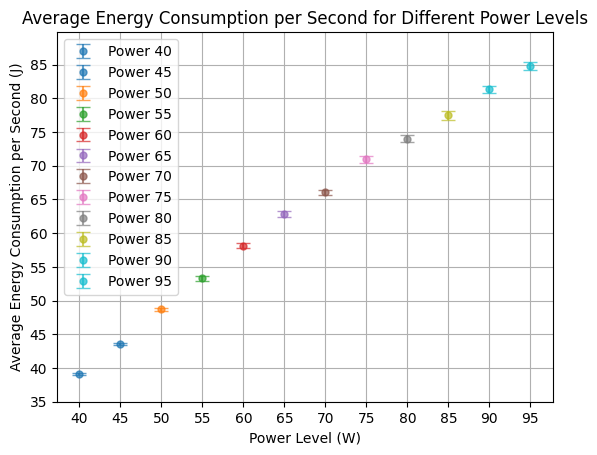

In [59]:
# Define the power levels and corresponding average batch energy
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
average_batch_energy = [np.mean(AvgperSecondEnergy_40), np.mean(AvgperSecondEnergy_45), np.mean(AvgperSecondEnergy_50), np.mean(AvgperSecondEnergy_55), np.mean(AvgperSecondEnergy_60), np.mean(AvgperSecondEnergy_65), np.mean(AvgperSecondEnergy_70), np.mean(AvgperSecondEnergy_75), np.mean(AvgperSecondEnergy_80), np.mean(AvgperSecondEnergy_85), np.mean(AvgperSecondEnergy_90), np.mean(AvgperSecondEnergy_95)]
std_batch_energy = [np.std(AvgperSecondEnergy_40), np.std(AvgperSecondEnergy_45), np.std(AvgperSecondEnergy_50), np.std(AvgperSecondEnergy_55), np.std(AvgperSecondEnergy_60), np.std(AvgperSecondEnergy_65), np.std(AvgperSecondEnergy_70), np.std(AvgperSecondEnergy_75), np.std(AvgperSecondEnergy_80), np.std(AvgperSecondEnergy_85), np.std(AvgperSecondEnergy_90), np.std(AvgperSecondEnergy_95)]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the average batch energy for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_batch_energy[i], yerr=std_batch_energy[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Energy Consumption per Second (J)')
plt.title('Average Energy Consumption per Second for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Set y-axis ticks to be more clear with each block being 5
plt.yticks(np.arange(35, max(average_batch_energy) + 5, 5))

# Set y-axis limit to start from 35
plt.ylim(35, max(average_batch_energy) + 5)

plt.show()

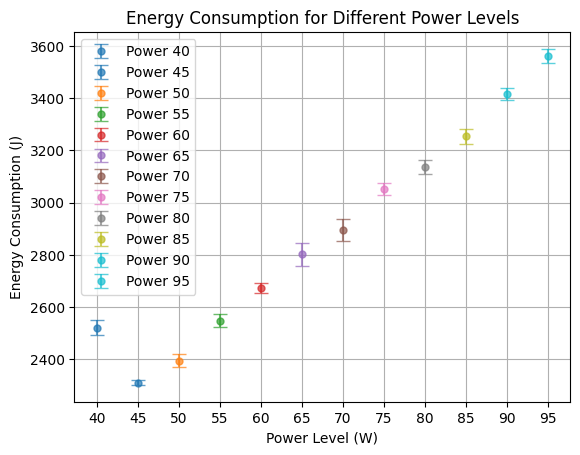

In [60]:
# Define the power levels and corresponding average EpochEnergy and standard deviation
average_epoch_energy = [np.mean(EpochEnergy_40), np.mean(EpochEnergy_45), np.mean(EpochEnergy_50), np.mean(EpochEnergy_55), np.mean(EpochEnergy_60), np.mean(EpochEnergy_65), np.mean(EpochEnergy_70), np.mean(EpochEnergy_75), np.mean(EpochEnergy_80), np.mean(EpochEnergy_85), np.mean(EpochEnergy_90), np.mean(EpochEnergy_95)]
std_epoch_energy = [np.std(EpochEnergy_40), np.std(EpochEnergy_45), np.std(EpochEnergy_50), np.std(EpochEnergy_55), np.std(EpochEnergy_60), np.std(EpochEnergy_65), np.std(EpochEnergy_70), np.std(EpochEnergy_75), np.std(EpochEnergy_80), np.std(EpochEnergy_85), np.std(EpochEnergy_90), np.std(EpochEnergy_95)]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the average EpochEnergy for each power level with error bars and different colors
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, average_epoch_energy[i], yerr=std_epoch_energy[i], fmt='o', markersize=5, capsize=5, color=colors[i], label=f'Power {power_level}', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Consumption (J)')
plt.title('Energy Consumption for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

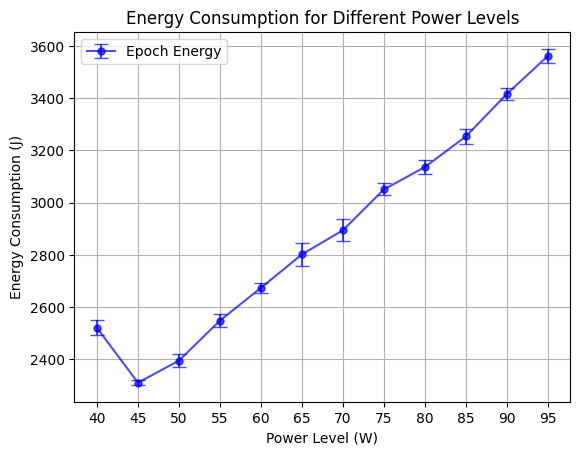

In [61]:
# Define the power levels and corresponding average EpochEnergy and standard deviation
average_epoch_energy = [np.mean(EpochEnergy_40), np.mean(EpochEnergy_45), np.mean(EpochEnergy_50), np.mean(EpochEnergy_55), np.mean(EpochEnergy_60), np.mean(EpochEnergy_65), np.mean(EpochEnergy_70), np.mean(EpochEnergy_75), np.mean(EpochEnergy_80), np.mean(EpochEnergy_85), np.mean(EpochEnergy_90), np.mean(EpochEnergy_95)]
std_epoch_energy = [np.std(EpochEnergy_40), np.std(EpochEnergy_45), np.std(EpochEnergy_50), np.std(EpochEnergy_55), np.std(EpochEnergy_60), np.std(EpochEnergy_65), np.std(EpochEnergy_70), np.std(EpochEnergy_75), np.std(EpochEnergy_80), np.std(EpochEnergy_85), np.std(EpochEnergy_90), np.std(EpochEnergy_95)]

# Plot the average EpochEnergy for each power level with error bars and a single color
plt.errorbar(power_levels, average_epoch_energy, yerr=std_epoch_energy, fmt='o-', markersize=5, capsize=5, color='b', label='Epoch Energy', alpha=0.7)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Consumption (J)')
plt.title('Energy Consumption for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()


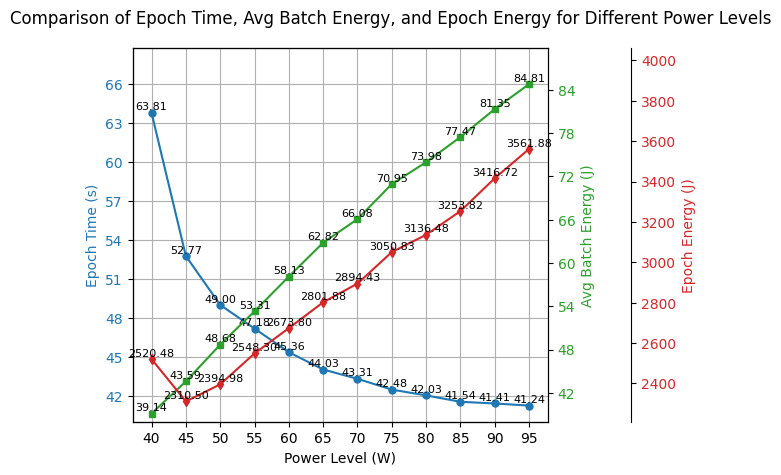

In [62]:
# Plot the average EpochTime, Avg Batch Energy, and Epoch Energy for each power level
fig, ax1 = plt.subplots()

# Plot EpochTime
ax1.set_xlabel('Power Level (W)')
ax1.set_ylabel('Epoch Time (s)', color='tab:blue')
ax1.plot(power_levels, average_epoch_times, 'o-', color='tab:blue', label='Epoch Time', markersize=5)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Annotate each point with its value
for i, txt in enumerate(average_epoch_times):
    ax1.annotate(f'{txt:.2f}', (power_levels[i], average_epoch_times[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Create a secondary y-axis to plot AvgperSecondEnergy
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Batch Energy (J)', color='tab:green')
ax2.plot(power_levels, average_batch_energy, 's-', color='tab:green', label='Avg Batch Energy', markersize=5)
ax2.tick_params(axis='y', labelcolor='tab:green')

# Annotate each point with its value
for i, txt in enumerate(average_batch_energy):
    ax2.annotate(f'{txt:.2f}', (power_levels[i], average_batch_energy[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Create another secondary y-axis to plot EpochEnergy
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.set_ylabel('Epoch Energy (J)', color='tab:red')
ax3.plot(power_levels, average_epoch_energy, 'd-', color='tab:red', label='Epoch Energy', markersize=5)
ax3.tick_params(axis='y', labelcolor='tab:red')

# Annotate each point with its value
for i, txt in enumerate(average_epoch_energy):
    ax3.annotate(f'{txt:.2f}', (power_levels[i], average_epoch_energy[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=8)

# Add a title and show the plot
fig.suptitle('Comparison of Epoch Time, Avg Batch Energy, and Epoch Energy for Different Power Levels')
fig.tight_layout()

# Set x-axis ticks to be more clear with each block being 5
ax1.set_xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Set y-axis limits to be close to the minimum value
ax1.set_ylim(min(average_epoch_times) - 1, max(average_epoch_times) + 5)
ax2.set_ylim(min(average_batch_energy) - 1, max(average_batch_energy) + 5)
ax3.set_ylim(min(average_epoch_energy) - 100, max(average_epoch_energy) + 500)

# Add more labels to the y-axes
ax1.set_yticks(np.arange(int(min(average_epoch_times) - 1), int(max(average_epoch_times) + 5), 2))
ax2.set_yticks(np.arange(int(min(average_batch_energy) - 1), int(max(average_batch_energy) + 5), 5))
ax3.set_yticks(np.arange(int(min(average_epoch_energy) - 100), int(max(average_epoch_energy) + 500), 500))

# Ensure y-axis labels are integers
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))

# Add grid
ax1.grid(True)

plt.show()


### calculate the MACs and FLOPs of the model
    1. MACs: Multiply-Accumulate Operations
    2. FLOPs: Floating Point Operations


In [63]:
def alexnet(img_channel, num_labels):
    net = nn.Sequential(
        # 这里使用一个11*11的更大窗口来捕捉对象。
        # 同时，步幅为4，以减少输出的高度和宽度。
        # 另外，输出通道的数目远大于LeNet
        nn.Conv2d(img_channel, 64, kernel_size=11, stride=4, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        # 减小卷积窗口，使用填充为2来使得输入与输出的高和宽一致，且增大输出通道数
        nn.Conv2d(64, 192, kernel_size=5, padding=2), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        # 使用三个连续的卷积层和较小的卷积窗口。
        # 除了最后的卷积层，输出通道的数量进一步增加。
        # 在前两个卷积层之后，汇聚层不用于减少输入的高度和宽度
        nn.Conv2d(192, 384, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
        nn.Conv2d(256, 256, kernel_size=3, padding=1), nn.ReLU(),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.AdaptiveAvgPool2d((6, 6)),   # 使用全局平均池化对每个通道中所有元素求平均并直接将结果传递到全连接层
        nn.Flatten(),
        # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过拟合
        nn.Linear(256 * 6 * 6, 4096), nn.ReLU(),
        nn.Dropout(p=0.5),
        nn.Linear(4096, 4096), nn.ReLU(),
        nn.Dropout(p=0.5),
        # 最后是输出层。由于这里使用Fashion-MNIST，所以用类别数为10，而非论文中的1000
        nn.Linear(4096, num_labels))
    return net

In [64]:
# print the model structure
net = alexnet(3, 100)    
# print(net)
# print each layer
layer_name = []
for layer in net:
    name = layer.__class__.__name__
    layer_name.append(name)
# find the unique layer name, and fix the order
layer_name = sorted(list(set(layer_name)))
print('The layer name is:', layer_name)
# the number of layers, which contains ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
num_layers = len(layer_name) 
print('The number of layers is:', num_layers)

The layer name is: ['AdaptiveAvgPool2d', 'Conv2d', 'Dropout', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU']
The number of layers is: 7


In [65]:
from ptflops import get_model_complexity_info

# Define the input size for the model
input_size = (3, 224, 224)  # Example input size for AlexNet with single channel

# Calculate MACs and parameters
macs, params = get_model_complexity_info(net, input_size, as_strings=True, print_per_layer_stat=True, verbose=True)

print(f"MACs: {macs}")
print(f"Parameters: {params}")

Sequential(
  57.41 M, 100.000% Params, 711.87 MMac, 99.877% MACs, 
  (0): Conv2d(23.3 k, 0.041% Params, 70.47 MMac, 9.887% MACs, 3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(0, 0.000% Params, 193.6 KMac, 0.027% MACs, )
  (2): MaxPool2d(0, 0.000% Params, 193.6 KMac, 0.027% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(307.39 k, 0.535% Params, 224.09 MMac, 31.440% MACs, 64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(0, 0.000% Params, 139.97 KMac, 0.020% MACs, )
  (5): MaxPool2d(0, 0.000% Params, 139.97 KMac, 0.020% MACs, kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(663.94 k, 1.156% Params, 112.21 MMac, 15.742% MACs, 192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(0, 0.000% Params, 64.9 KMac, 0.009% MACs, )
  (8): Conv2d(884.99 k, 1.541% Params, 149.56 MMac, 20.984% MACs, 384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): R

In [66]:
print(macs)
# transfer the string to the number
macs = float(macs.split(' ')[0])
macs = macs * 1e6
print(macs)

712.75 MMac
712750000.0


In [67]:
# the macs means that a picture needs how many multiply-add operations
# the parameters means that the number of parameters in the model
# calculate the number of all operations during the training process in one epoch
# The number of multiply-add operations = MACs * number of pictures
# for the fashion mnist dataset, the number of pictures is 60000, the test set is 10000
# the number of multiply-add operations in one epoch of the training process = MACs * 60000
# the number of multiply-add operations in one epoch of the test process = MACs * 10000

TotalMACsEpcohTrain = macs * 50000
TotalMACsEpochTest = macs * 10000
print(f'The total number of multiply-add operations in one epoch of the training process is: {TotalMACsEpcohTrain}')
print(f'The total number of multiply-add operations in one epoch of the test process is: {TotalMACsEpochTest}')

The total number of multiply-add operations in one epoch of the training process is: 35637500000000.0
The total number of multiply-add operations in one epoch of the test process is: 7127500000000.0


In [68]:
# calculate the average speed of the multiply-add operations in one second under different power levels
# the speed of the multiply-add operations in one second = TotalMACsEpcohTrain / TrainTime(the TrainTime is the average time of each epoch under different power levels)
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
train_times = [TrainTime_40, TrainTime_45, TrainTime_50, TrainTime_55, TrainTime_60, TrainTime_65, TrainTime_70, TrainTime_75, TrainTime_80, TrainTime_85, TrainTime_90, TrainTime_95]

train_speeds = [np.round(TotalMACsEpcohTrain / np.mean(train_time), 2) for train_time in train_times]

for power_level, train_speed in zip(power_levels, train_speeds):
    print(f'Train speed at power level {power_level}W: {train_speed} MACs/s')


Train speed at power level 40W: 604273222600.26 MACs/s
Train speed at power level 45W: 738690822307.73 MACs/s
Train speed at power level 50W: 799267122336.74 MACs/s
Train speed at power level 55W: 832328917610.16 MACs/s
Train speed at power level 60W: 866582325420.42 MACs/s
Train speed at power level 65W: 895113011588.38 MACs/s
Train speed at power level 70W: 911833484743.84 MACs/s
Train speed at power level 75W: 930728665498.74 MACs/s
Train speed at power level 80W: 941480969781.83 MACs/s
Train speed at power level 85W: 954492799760.94 MACs/s
Train speed at power level 90W: 957996508729.44 MACs/s
Train speed at power level 95W: 962565340917.74 MACs/s


In [69]:
TrainSpeedEpoch = [np.round(TotalMACsEpcohTrain/train_time,2) for train_time in train_times]
print(TrainSpeedEpoch)

[array([6.09312034e+11, 6.06368262e+11, 6.05453376e+11, 6.01519077e+11,
       5.98826720e+11]), array([7.40573905e+11, 7.40142034e+11, 7.39969720e+11, 7.38011565e+11,
       7.34788086e+11]), array([8.01774172e+11, 7.99645656e+11, 7.99325077e+11, 7.98404432e+11,
       7.97200586e+11]), array([8.30029749e+11, 8.36000446e+11, 8.34200052e+11, 8.28285263e+11,
       8.33176371e+11]), array([8.71872507e+11, 8.66591314e+11, 8.65938487e+11, 8.65007420e+11,
       8.63548006e+11]), array([8.99656522e+11, 8.95372550e+11, 8.94364551e+11, 8.93469997e+11,
       8.92734445e+11]), array([9.21078618e+11, 9.14278388e+11, 9.08670366e+11, 9.06846877e+11,
       9.08443590e+11]), array([9.32526420e+11, 9.30791148e+11, 9.31955984e+11, 9.29182242e+11,
       9.29197716e+11]), array([9.39141495e+11, 9.45424611e+11, 9.41446371e+11, 9.41154850e+11,
       9.40261497e+11]), array([9.55985770e+11, 9.55717795e+11, 9.55081000e+11, 9.53245803e+11,
       9.52443933e+11]), array([9.62982979e+11, 9.59802287e+11, 

In [97]:
# change the TrainSpeedEpoch into a dataframe
TrainSpeedEpoch = np.array(TrainSpeedEpoch)
# transfer the data into a dataframe, the columns are the power levels
df = pd.DataFrame(TrainSpeedEpoch, index=power_levels)
df = df.T
df

,40,45,50,55,60,65,70,75,80,85,90,95
0,6.093120e+11,7.405739e+11,8.017742e+11,8.300297e+11,8.718725e+11,8.996565e+11,9.210786e+11,9.325264e+11,9.391415e+11,9.559858e+11,9.629830e+11,9.659566e+11
1,6.063683e+11,7.401420e+11,7.996457e+11,8.360004e+11,8.665913e+11,8.953725e+11,9.142784e+11,9.307911e+11,9.454246e+11,9.557178e+11,9.598023e+11,9.638657e+11
2,6.054534e+11,7.399697e+11,7.993251e+11,8.342001e+11,8.659385e+11,8.943646e+11,9.086704e+11,9.319560e+11,9.414464e+11,9.550810e+11,9.550211e+11,9.630497e+11
3,6.015191e+11,7.380116e+11,7.984044e+11,8.282853e+11,8.650074e+11,8.934700e+11,9.068469e+11,9.291822e+11,9.411549e+11,9.532458e+11,9.562963e+11,9.607247e+11
4,5.988267e+11,7.347881e+11,7.972006e+11,8.331764e+11,8.635480e+11,8.927344e+11,9.084436e+11,9.291977e+11,9.402615e+11,9.524439e+11,9.559258e+11,9.592589e+11


In [98]:
# save the data into a csv file, and do not save the index
# define the path
savePath = os.path.join(parentPath, 'Data/alexnet/CombinedInfo/TrainSpeed_c.csv')
df.to_csv(savePath, index=False)

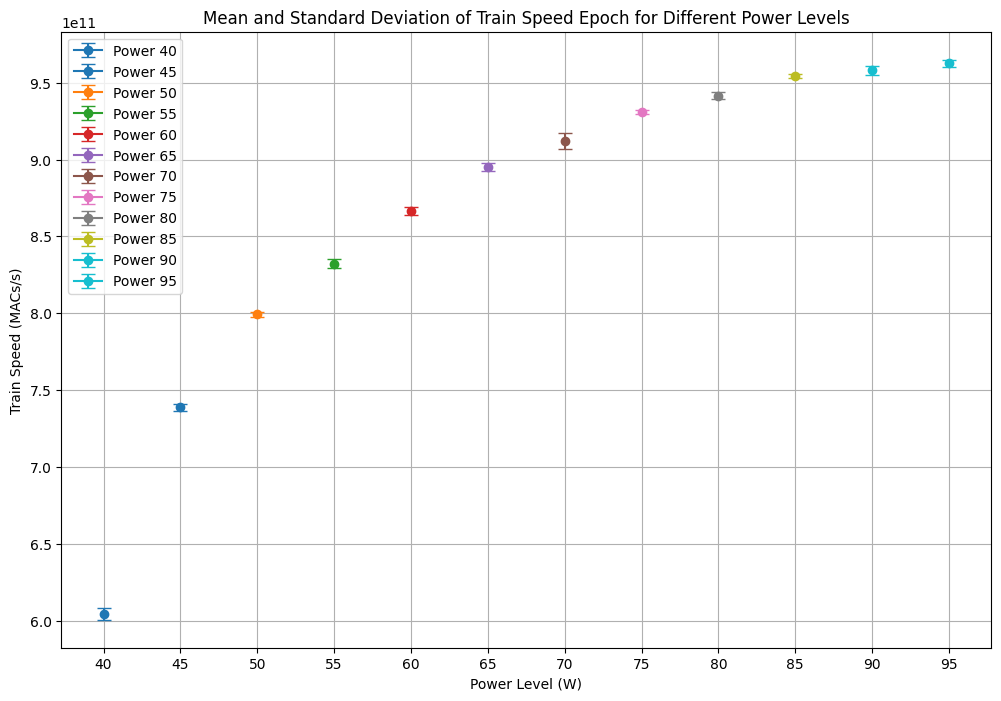

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of TrainSpeedEpoch for each power level
mean_train_speed_epoch = np.mean(TrainSpeedEpoch, axis=1)
std_train_speed_epoch = np.std(TrainSpeedEpoch, axis=1)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the mean and standard deviation of TrainSpeedEpoch for each power level with different colors
plt.figure(figsize=(12, 8))
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, mean_train_speed_epoch[i], yerr=std_train_speed_epoch[i], fmt='o-', capsize=5, color=colors[i], label=f'Power {power_level}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed (MACs/s)')
plt.title('Mean and Standard Deviation of Train Speed Epoch for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

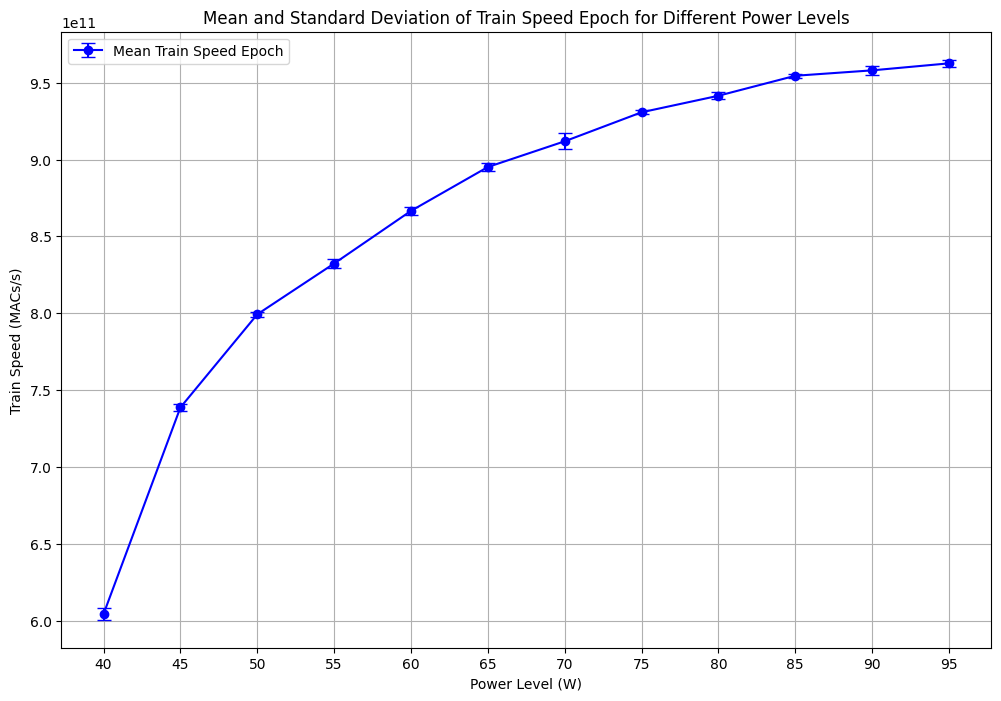

In [71]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of TrainSpeedEpoch for each power level
mean_train_speed_epoch = np.mean(TrainSpeedEpoch, axis=1)
std_train_speed_epoch = np.std(TrainSpeedEpoch, axis=1)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Plot the mean and standard deviation of TrainSpeedEpoch for each power level
plt.figure(figsize=(12, 8))
plt.errorbar(power_levels, mean_train_speed_epoch, yerr=std_train_speed_epoch, fmt='o-', capsize=5, color='b', label='Mean Train Speed Epoch')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed (MACs/s)')
plt.title('Mean and Standard Deviation of Train Speed Epoch for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

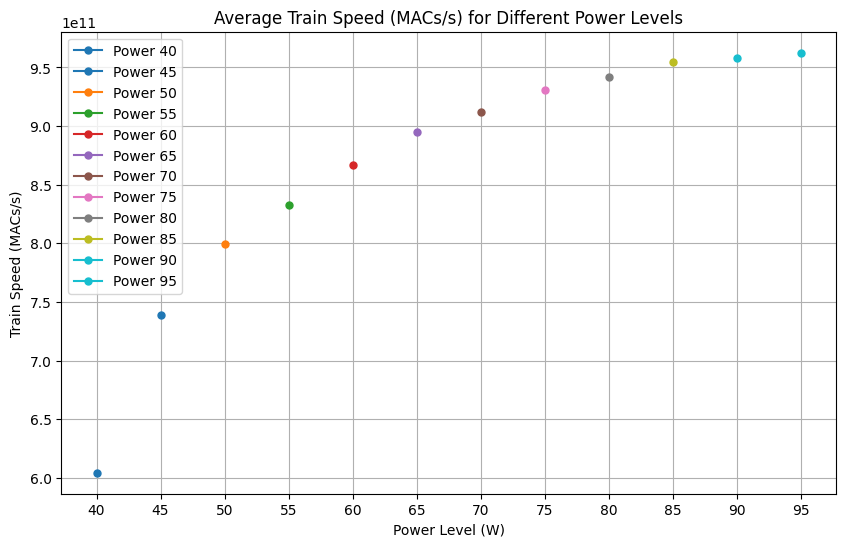

In [72]:
# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the train speed of each power level with different colors
plt.figure(figsize=(10, 6))
for i, power_level in enumerate(power_levels):
    plt.plot(power_level, train_speeds[i], 'o-', color=colors[i], label=f'Power {power_level}', markersize=5)

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed (MACs/s)')
plt.title('Average Train Speed (MACs/s) for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

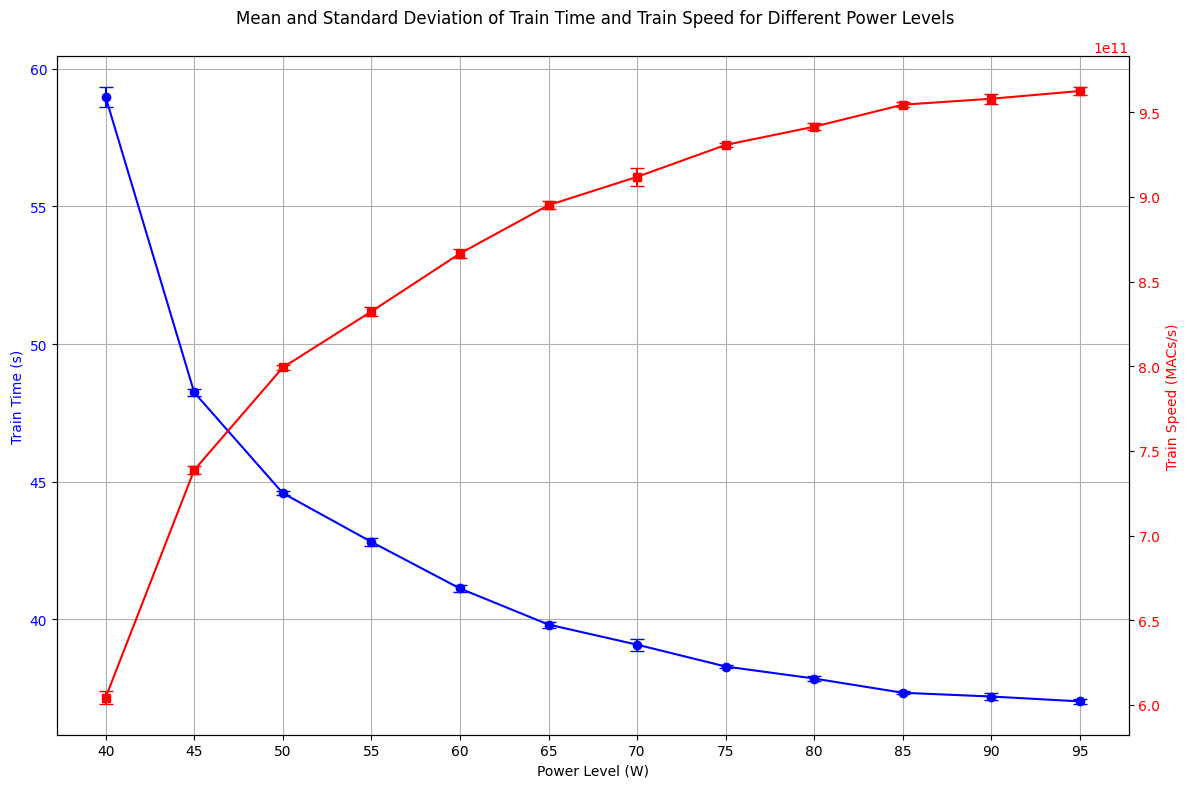

In [73]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of Train Time for each power level
mean_train_times = [np.mean(TrainTime_40), np.mean(TrainTime_45), np.mean(TrainTime_50), np.mean(TrainTime_55), np.mean(TrainTime_60), np.mean(TrainTime_65), np.mean(TrainTime_70), np.mean(TrainTime_75), np.mean(TrainTime_80), np.mean(TrainTime_85), np.mean(TrainTime_90), np.mean(TrainTime_95)]
std_train_times = [np.std(TrainTime_40), np.std(TrainTime_45), np.std(TrainTime_50), np.std(TrainTime_55), np.std(TrainTime_60), np.std(TrainTime_65), np.std(TrainTime_70), np.std(TrainTime_75), np.std(TrainTime_80), np.std(TrainTime_85), np.std(TrainTime_90), np.std(TrainTime_95)]


# Calculate the mean and standard deviation of Train Speed for each power level
mean_train_speed_epoch = np.mean(TrainSpeedEpoch, axis=1)
std_train_speed_epoch = np.std(TrainSpeedEpoch, axis=1)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean and standard deviation of Train Time
ax1.errorbar(power_levels, mean_train_times, yerr=std_train_times, fmt='o-', capsize=5, color='b', label='Mean Train Time')
ax1.set_xlabel('Power Level (W)')
ax1.set_ylabel('Train Time (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis to plot Train Speed
ax2 = ax1.twinx()
ax2.errorbar(power_levels, mean_train_speed_epoch, yerr=std_train_speed_epoch, fmt='s-', capsize=5, color='r', label='Mean Train Speed')
ax2.set_ylabel('Train Speed (MACs/s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and show the plot
fig.suptitle('Mean and Standard Deviation of Train Time and Train Speed for Different Power Levels')
fig.tight_layout()

# Set x-axis ticks to be more clear with each block being 5
ax1.set_xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Add grid
ax1.grid(True)

plt.show()

In [74]:
# Calculate the increase rate of the train speed under different power levels
train_speed_increase_rate = [(train_speeds[i] - train_speeds[i-1]) / train_speeds[i-1] * 100 if i != 0 else 0 for i in range(len(train_speeds))]

# Print the increase rate for each power level
for power_level, increase_rate in zip(power_levels, train_speed_increase_rate):
    print(f'Increase rate of train speed at power level {power_level}W: {increase_rate:.2f}%')

Increase rate of train speed at power level 40W: 0.00%
Increase rate of train speed at power level 45W: 22.24%
Increase rate of train speed at power level 50W: 8.20%
Increase rate of train speed at power level 55W: 4.14%
Increase rate of train speed at power level 60W: 4.12%
Increase rate of train speed at power level 65W: 3.29%
Increase rate of train speed at power level 70W: 1.87%
Increase rate of train speed at power level 75W: 2.07%
Increase rate of train speed at power level 80W: 1.16%
Increase rate of train speed at power level 85W: 1.38%
Increase rate of train speed at power level 90W: 0.37%
Increase rate of train speed at power level 95W: 0.48%


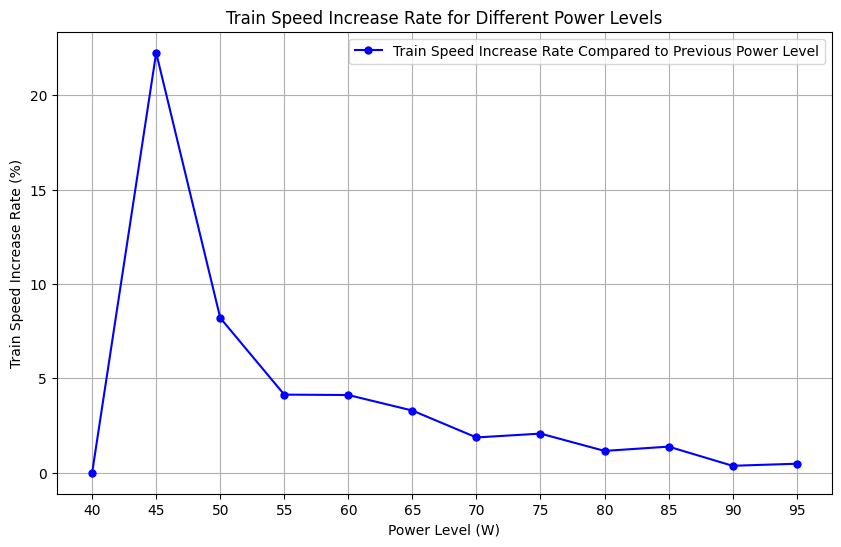

In [75]:
# Plot the train speed increase rate of each power level without different colors for each point
plt.figure(figsize=(10, 6))
plt.plot(power_levels, train_speed_increase_rate, 'o-', color='b', markersize=5, label='Train Speed Increase Rate Compared to Previous Power Level')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed Increase Rate (%)')
plt.title('Train Speed Increase Rate for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()


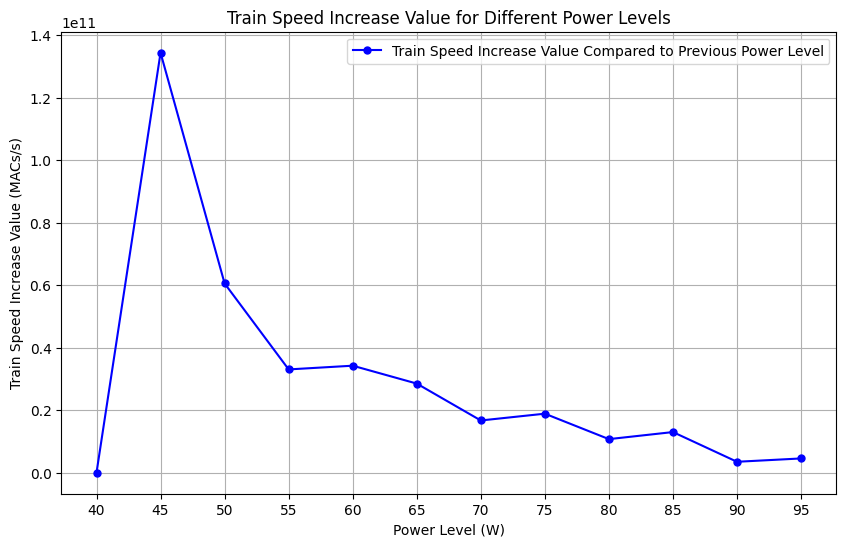

In [76]:
# Calculate the train speed increase value for each power level
train_speed_increase_value = [train_speeds[i] - train_speeds[i-1] if i != 0 else 0 for i in range(len(train_speeds))]

# Plot the train speed increase value of each power level without different colors for each point
plt.figure(figsize=(10, 6))
plt.plot(power_levels, train_speed_increase_value, 'o-', color='b', markersize=5, label='Train Speed Increase Value Compared to Previous Power Level')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed Increase Value (MACs/s)')
plt.title('Train Speed Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

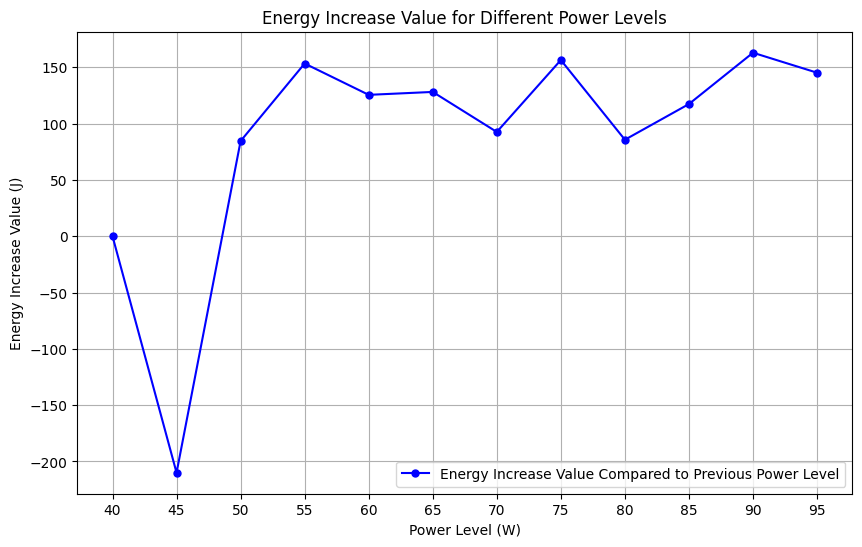

In [77]:
# Calculate the energy increase value for each power level
energy_increase_value = [average_epoch_energy[i] - average_epoch_energy[i-1] if i != 0 else 0 for i in range(len(average_epoch_energy))]

# Plot the energy increase value of each power level
plt.figure(figsize=(10, 6))
plt.plot(power_levels, energy_increase_value, 'o-', color='b', markersize=5, label='Energy Increase Value Compared to Previous Power Level')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Increase Value (J)')
plt.title('Energy Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

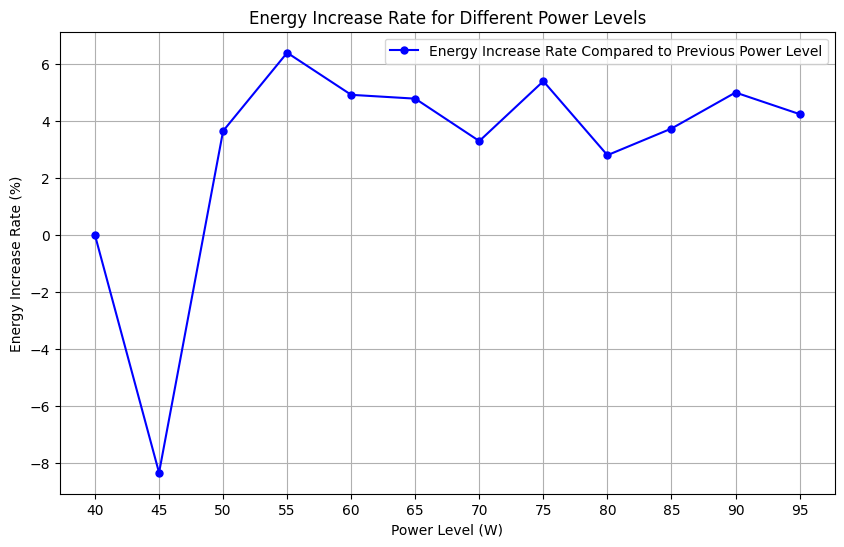

In [78]:
# Calculate the energy increase rate for each power level
energy_increase_rate = [(energy_increase_value[i] / average_epoch_energy[i-1] * 100) if i != 0 else 0 for i in range(len(average_epoch_energy))]

# Plot the energy increase rate of each power level
plt.figure(figsize=(10, 6))
plt.plot(power_levels, energy_increase_rate, 'o-', color='b', markersize=5, label='Energy Increase Rate Compared to Previous Power Level')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Increase Rate (%)')
plt.title('Energy Increase Rate for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

In [79]:
# Transfer the value in train_speed_increase_value to exponential form
train_speed_increase_value_exp = [format(value, '.2e') for value in train_speed_increase_value]

# Print the exponential values
for power_level, value_exp in zip(power_levels, train_speed_increase_value_exp):
    print(f'Train speed increase value at power level {power_level}W: {value_exp}')

Train speed increase value at power level 40W: 0.00e+00
Train speed increase value at power level 45W: 1.34e+11
Train speed increase value at power level 50W: 6.06e+10
Train speed increase value at power level 55W: 3.31e+10
Train speed increase value at power level 60W: 3.43e+10
Train speed increase value at power level 65W: 2.85e+10
Train speed increase value at power level 70W: 1.67e+10
Train speed increase value at power level 75W: 1.89e+10
Train speed increase value at power level 80W: 1.08e+10
Train speed increase value at power level 85W: 1.30e+10
Train speed increase value at power level 90W: 3.50e+09
Train speed increase value at power level 95W: 4.57e+09


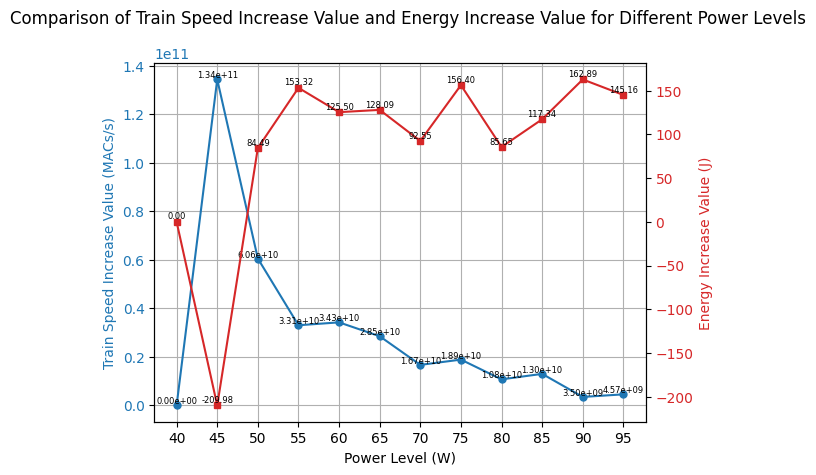

In [80]:
fig, ax1 = plt.subplots()

# Plot train speed increase value
ax1.set_xlabel('Power Level (W)')
ax1.set_ylabel('Train Speed Increase Value (MACs/s)', color='tab:blue')
ax1.plot(power_levels, train_speed_increase_value, 'o-', color='tab:blue', label='Train Speed Increase Value', markersize=5)
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Annotate each point with its value in exponential form
for i, txt in enumerate(train_speed_increase_value_exp):
    ax1.annotate(txt, (power_levels[i], train_speed_increase_value[i]), textcoords="offset points", xytext=(0,1), ha='center', fontsize=6)

# Create a secondary y-axis to plot energy increase value
ax2 = ax1.twinx()
ax2.set_ylabel('Energy Increase Value (J)', color='tab:red')
ax2.plot(power_levels, energy_increase_value, 's-', color='tab:red', label='Energy Increase Value', markersize=5)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Annotate each point with its value
for i, txt in enumerate(energy_increase_value):
    ax2.annotate(f'{txt:.2f}', (power_levels[i], energy_increase_value[i]), textcoords="offset points", xytext=(0,2), ha='center', fontsize=6)

# Add a title and show the plot
fig.suptitle('Comparison of Train Speed Increase Value and Energy Increase Value for Different Power Levels')
fig.tight_layout()

# Set x-axis ticks to be more clear with each block being 5
ax1.set_xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Add grid
ax1.grid(True)

plt.show()

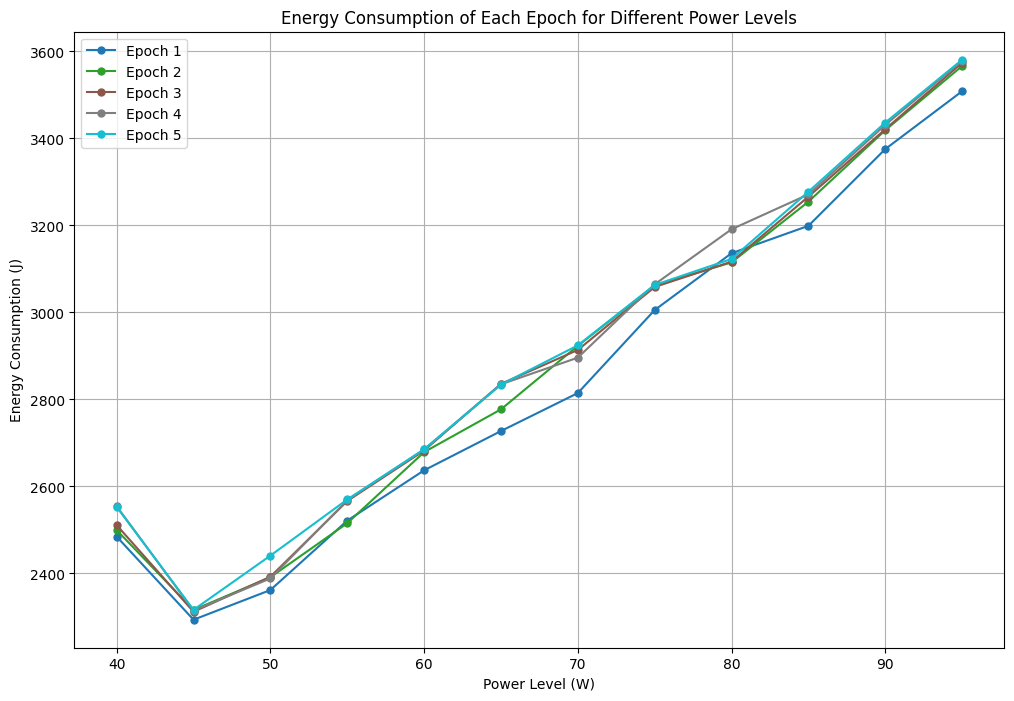

In [81]:
# Define the power levels and corresponding EpochEnergy
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
epoch_energy_list = [EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60, EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80, EpochEnergy_85, EpochEnergy_90, EpochEnergy_95]

# Define colors for each epoch
num_epochs = len(epoch_energy_list[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the energy consumption of each epoch for each power level with different colors
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    epoch_energy = [epoch_energy_list[i][epoch] for i in range(len(power_levels))]
    plt.plot(power_levels, epoch_energy, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Consumption (J)')
plt.title('Energy Consumption of Each Epoch for Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

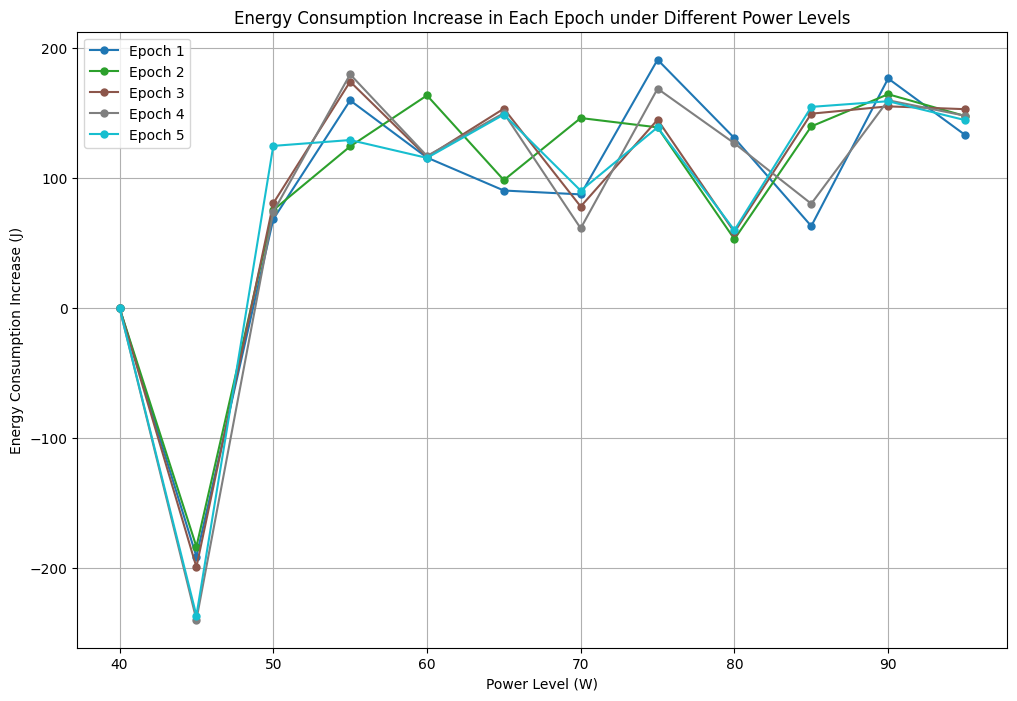

In [82]:
import numpy as np

import matplotlib.pyplot as plt

# Define the power levels and corresponding EpochEnergy
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
epoch_energy_list = [EpochEnergy_40, EpochEnergy_45, EpochEnergy_50, EpochEnergy_55, EpochEnergy_60, EpochEnergy_65, EpochEnergy_70, EpochEnergy_75, EpochEnergy_80, EpochEnergy_85, EpochEnergy_90, EpochEnergy_95]
# Define colors for each epoch
num_epochs = len(epoch_energy_list[0])

# Calculate the energy consumption increase for each epoch
energy_increase_list = []
for epoch in range(num_epochs):
    energy_increase = [epoch_energy_list[i][epoch] - epoch_energy_list[i-1][epoch] if i != 0 else 0 for i in range(len(epoch_energy_list))]
    energy_increase_list.append(energy_increase)

colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the energy consumption increase for each epoch under different power levels
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    energy_increase = [energy_increase_list[epoch][i] for i in range(len(epoch_energy_list))]
    plt.plot(power_levels, energy_increase, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Consumption Increase (J)')
plt.title('Energy Consumption Increase in Each Epoch under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

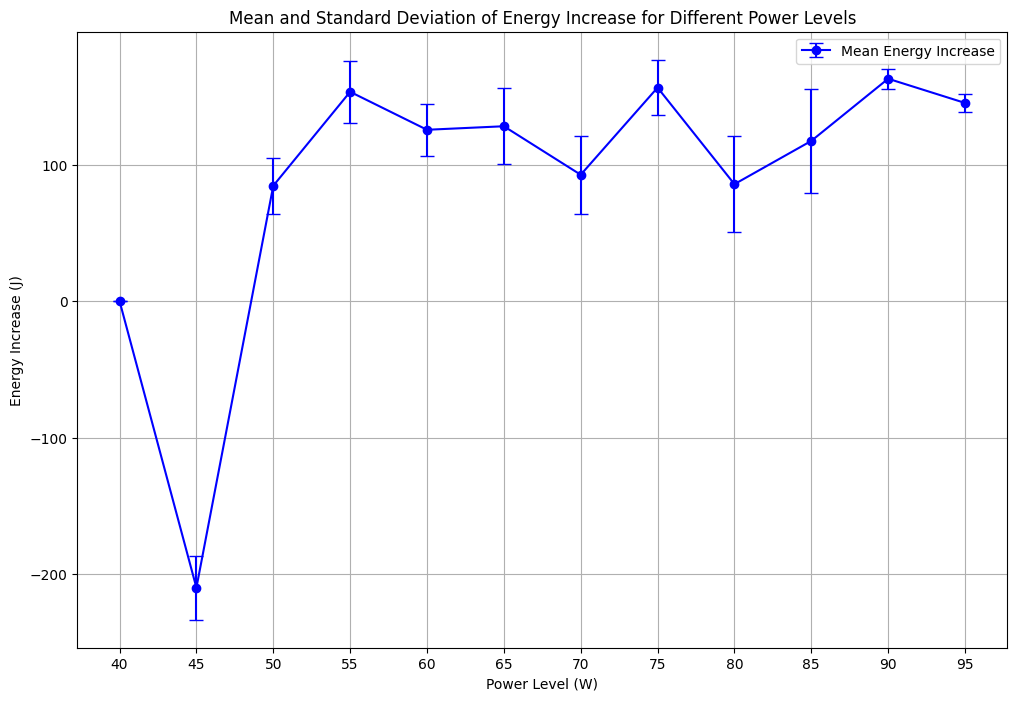

In [83]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of energy_increase_list for each power level
mean_energy_increase = np.mean(energy_increase_list, axis=0)
std_energy_increase = np.std(energy_increase_list, axis=0)

# print(mean_energy_increase, std_energy_increase)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Plot the mean and standard deviation of energy_increase_list for each power level
plt.figure(figsize=(12, 8))
plt.errorbar(power_levels, mean_energy_increase, yerr=std_energy_increase, fmt='o-', capsize=5, color='b', label='Mean Energy Increase')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Energy Increase (J)')
plt.title('Mean and Standard Deviation of Energy Increase for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

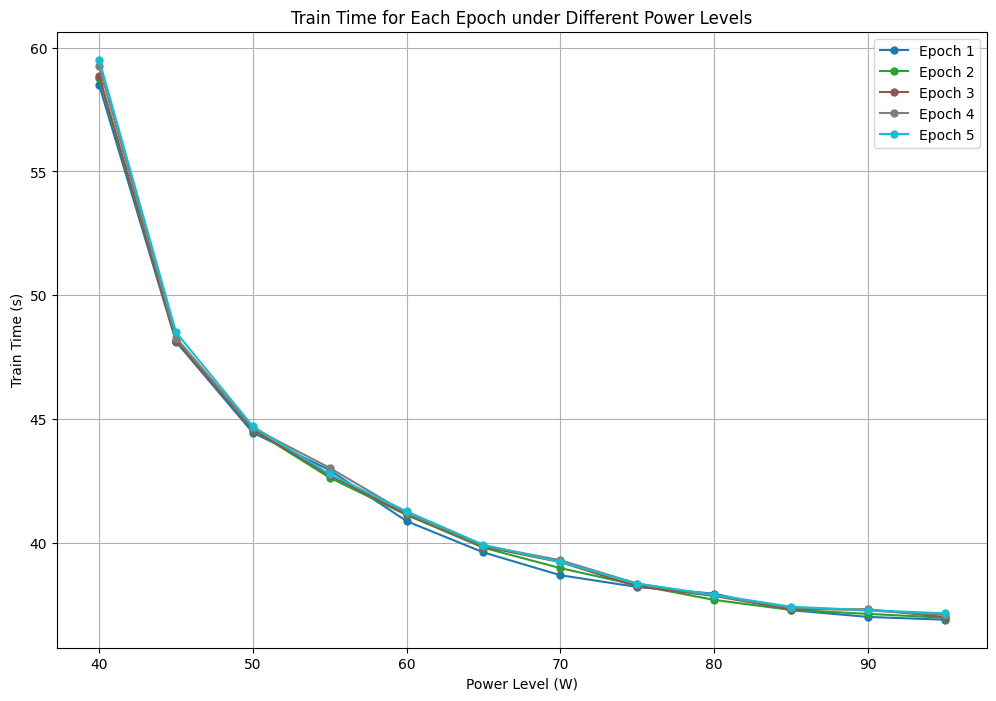

In [84]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
train_times = [TrainTime_40, TrainTime_45, TrainTime_50, TrainTime_55, TrainTime_60, TrainTime_65, TrainTime_70, TrainTime_75, TrainTime_80, TrainTime_85, TrainTime_90, TrainTime_95]

# Define colors for each epoch
num_epochs = len(train_times[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the TrainTime for each epoch under different power levels using line graph
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    epoch_train_times = [train_times[i][epoch] for i in range(len(power_levels))]
    plt.plot(power_levels, epoch_train_times, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Time (s)')
plt.title('Train Time for Each Epoch under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()


In [85]:
print(AvgperSecondEnergyList)

[array([38.82, 39.06, 39.24, 39.3 , 39.27]), array([43.28, 43.7 , 43.62, 43.67, 43.7 ]), array([48.2 , 48.8 , 48.82, 48.75, 48.82]), array([52.53, 53.52, 53.47, 53.5 , 53.54]), array([57.33, 58.24, 58.32, 58.37, 58.38]), array([61.99, 63.12, 63.02, 63.  , 62.98]), array([65.46, 66.44, 66.22, 65.82, 66.46]), array([69.9 , 71.21, 71.13, 71.27, 71.24]), array([72.93, 74.17, 74.21, 74.22, 74.36]), array([76.17, 77.49, 77.77, 77.89, 78.04]), array([80.37, 81.41, 81.46, 81.69, 81.82]), array([83.54, 84.92, 85.1 , 85.21, 85.26])]


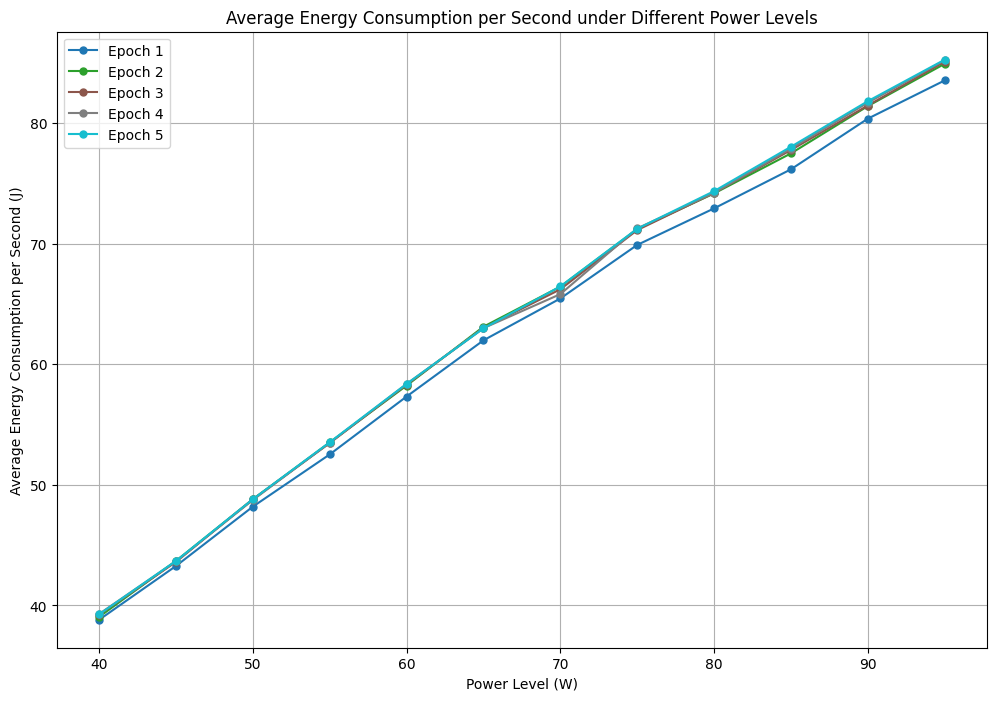

In [86]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
# the AvgperSecondEnergyList is the average energy consumption per second of each epoch under different power levels

# Define colors for each epoch
num_epochs = len(train_times[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the TrainTime for each epoch under different power levels using line graph
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    AvgPerSecEnergy = [AvgperSecondEnergyList[i][epoch] for i in range(len(power_levels))]
    plt.plot(power_levels, AvgPerSecEnergy, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Average Energy Consumption per Second (J)')
plt.title('Average Energy Consumption per Second under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()


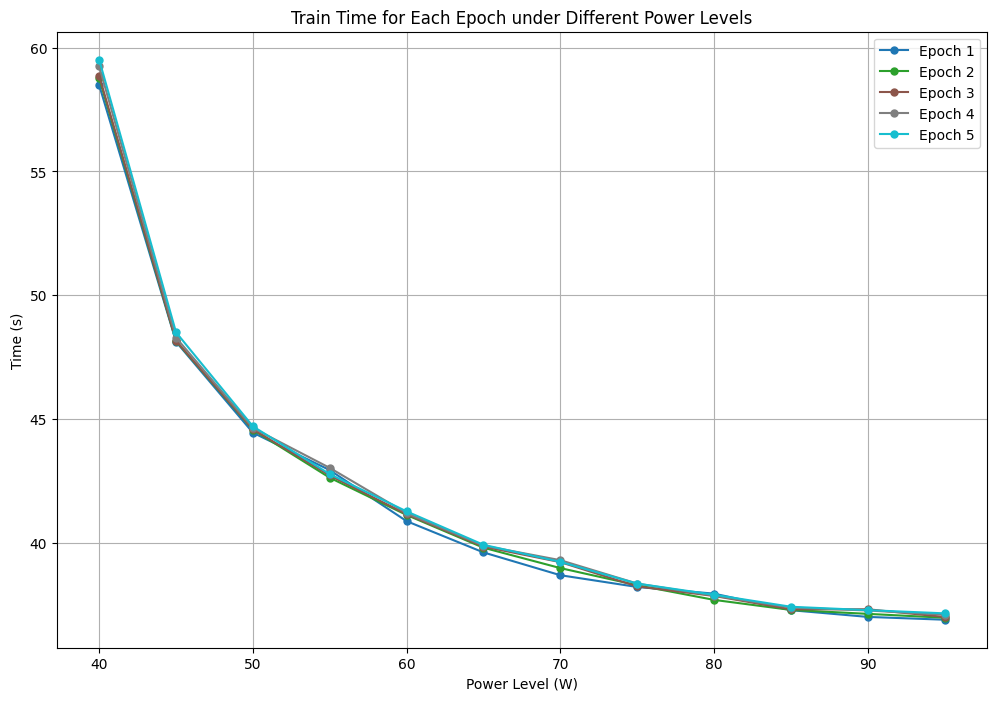

In [87]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
# the AvgperSecondEnergyList is the average energy consumption per second of each epoch under different power levels

# Define colors for each epoch
num_epochs = len(train_times[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the TrainTime for each epoch under different power levels using line graph
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    TrainTime = [train_times[i][epoch] for i in range(len(power_levels))]
    plt.plot(power_levels, TrainTime, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Time (s)')
plt.title('Train Time for Each Epoch under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

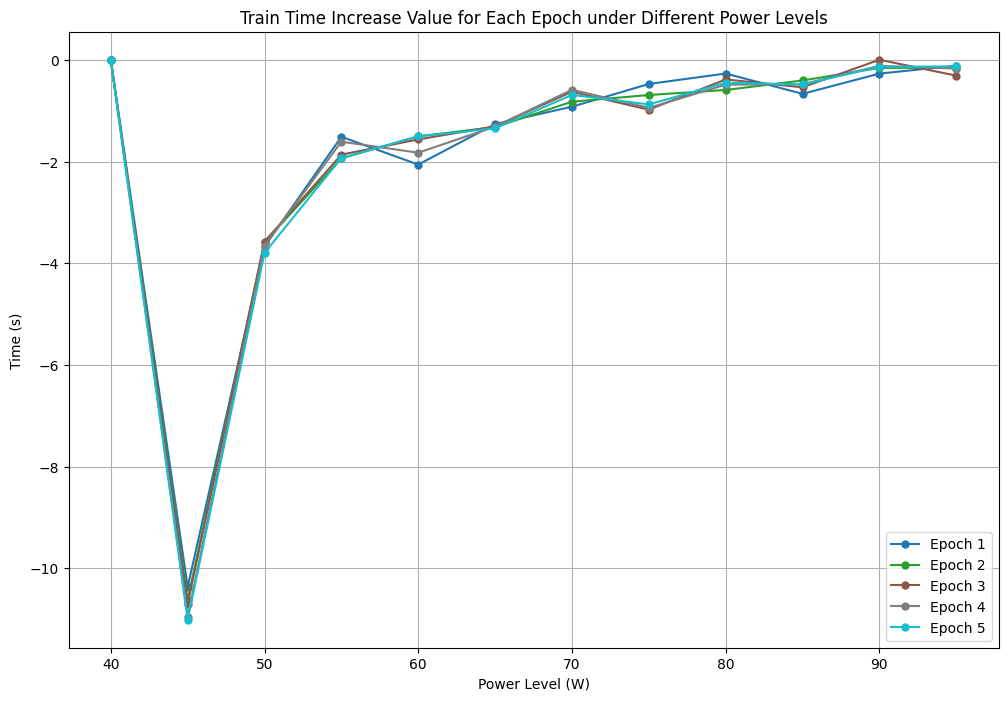

In [88]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
# the AvgperSecondEnergyList is the average energy consumption per second of each epoch under different power levels

# Define colors for each epoch
num_epochs = len(train_times[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the TrainTime for each epoch under different power levels using line graph
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    TrainTime = [train_times[i][epoch] - train_times[i-1][epoch] if i != 0 else 0 for i in range(len(power_levels))]
    plt.plot(power_levels, TrainTime, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Time (s)')
plt.title('Train Time Increase Value for Each Epoch under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

In [89]:
# Calculate the increase values in train_times for each epoch
TrainTimeIncreaseValue = [[train_times[i][epoch] - train_times[i-1][epoch] if i != 0 else 0 for i in range(len(power_levels))] for epoch in range(num_epochs)]
TrainTimeIncreaseValue = np.array(TrainTimeIncreaseValue)
# print(TrainTimeIncreaseValue)

[  0.         -10.73167009  -3.65641365  -1.77111487  -1.69241242
  -1.31078587  -0.73006644  -0.79345016  -0.43729463  -0.51601391
  -0.13655219  -0.17657056]
[0.         0.23476162 0.07988009 0.17564245 0.21913875 0.02813643
 0.12443789 0.18777524 0.107544   0.08745494 0.08731695 0.07022393]


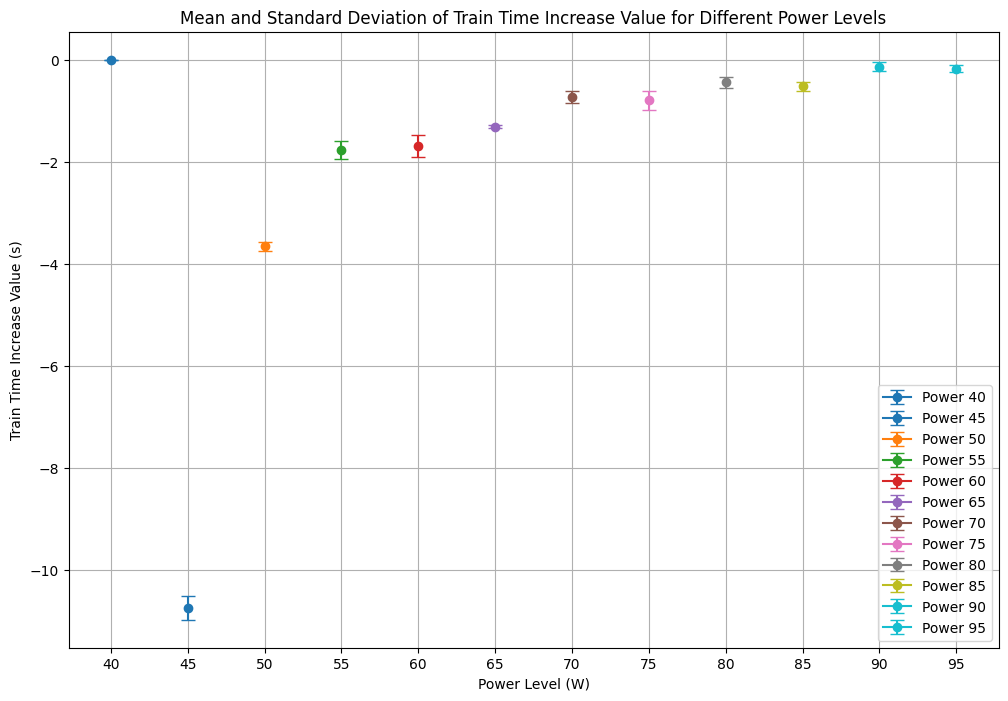

In [90]:
# Calculate the mean and standard deviation of TrainTimeIncreaseValue for each epoch
mean_increase_values = np.mean(TrainTimeIncreaseValue, axis=0)
std_increase_values = np.std(TrainTimeIncreaseValue, axis=0)
print(mean_increase_values)
print(std_increase_values)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the mean and standard deviation of TrainTimeIncreaseValue for each epoch
plt.figure(figsize=(12, 8))
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, mean_increase_values[i], yerr=std_increase_values[i], fmt='o-', capsize=5, color=colors[i], label=f'Power {power_level}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Time Increase Value (s)')
plt.title('Mean and Standard Deviation of Train Time Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

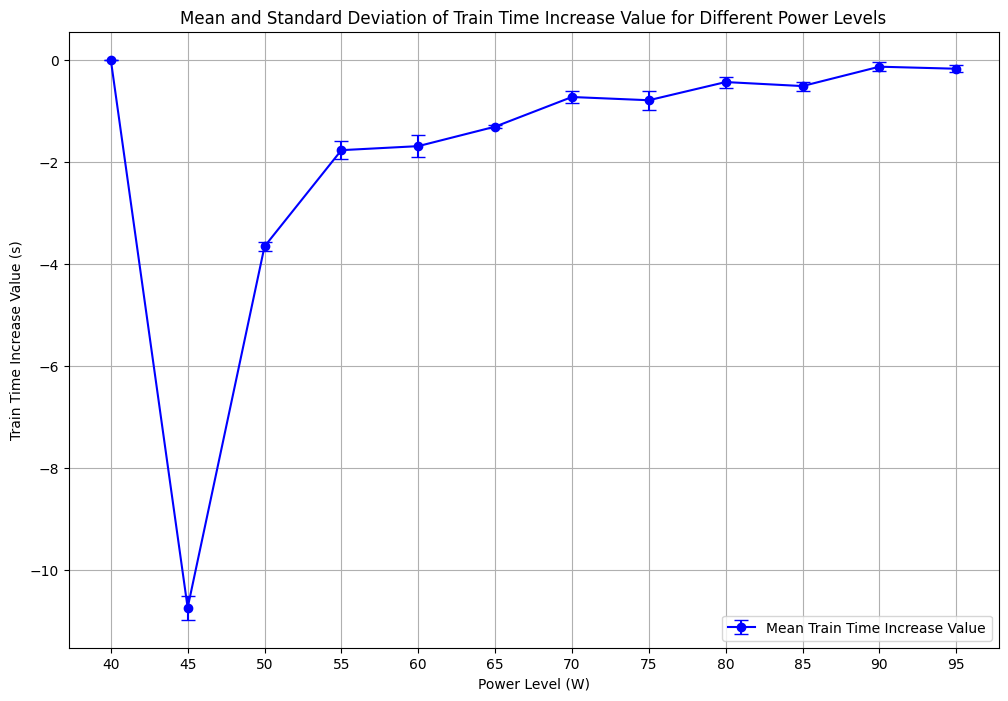

In [91]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Plot the mean and standard deviation of TrainTimeIncreaseValue for each epoch
plt.figure(figsize=(12, 8))
plt.errorbar(power_levels, mean_increase_values, yerr=std_increase_values, fmt='o-', capsize=5, color='b', label='Mean Train Time Increase Value')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Time Increase Value (s)')
plt.title('Mean and Standard Deviation of Train Time Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()


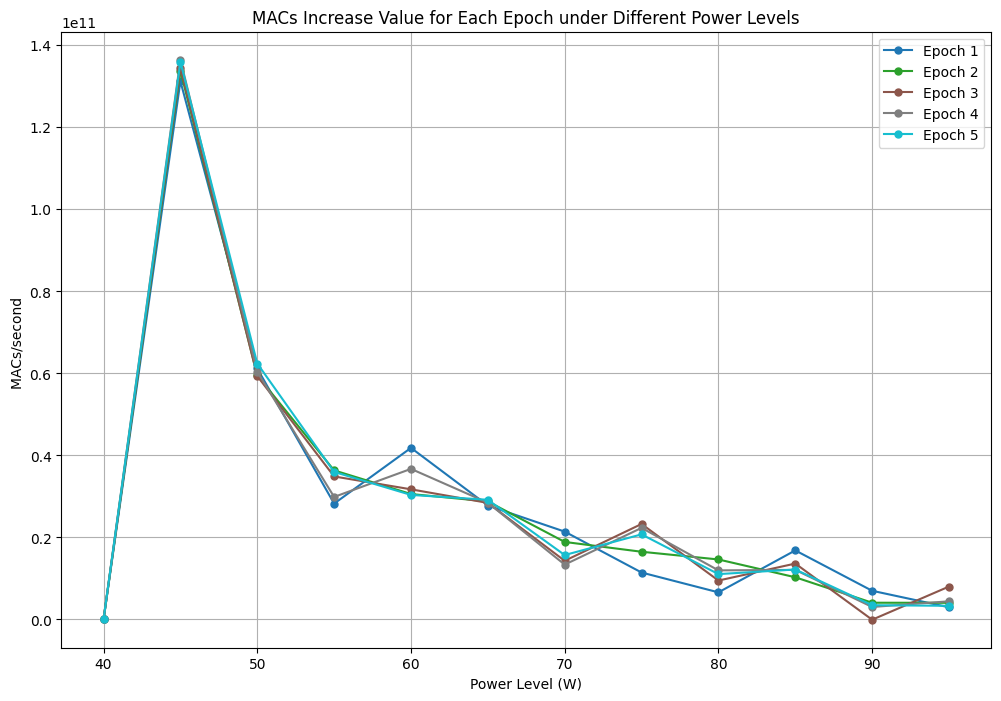

In [92]:
# Define the power levels and corresponding TrainTime
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
# the AvgperSecondEnergyList is the average energy consumption per second of each epoch under different power levels

# Define colors for each epoch
num_epochs = len(train_times[0])
colors = plt.cm.tab10(np.linspace(0, 1, num_epochs))

# Plot the TrainTime for each epoch under different power levels using line graph
plt.figure(figsize=(12, 8))
for epoch in range(num_epochs):
    TrainSpeed = [TrainSpeedEpoch[i][epoch] - TrainSpeedEpoch[i-1][epoch] if i != 0 else 0 for i in range(len(power_levels))]
    plt.plot(power_levels, TrainSpeed, 'o-', color=colors[epoch], markersize=5, label=f'Epoch {epoch+1}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('MACs/second ')
plt.title('MACs Increase Value for Each Epoch under Different Power Levels')
plt.grid(True)
plt.legend()
plt.show()

In [93]:
TrainSpeedIncreaseValue = [[TrainSpeedEpoch[i][epoch] - TrainSpeedEpoch[i-1][epoch] if i != 0 else 0 for i in range(len(power_levels))] for epoch in range(num_epochs)]
TrainSpeedIncreaseValue = np.array(TrainSpeedIncreaseValue)
# print(TrainSpeedIncreaseValue.shape)

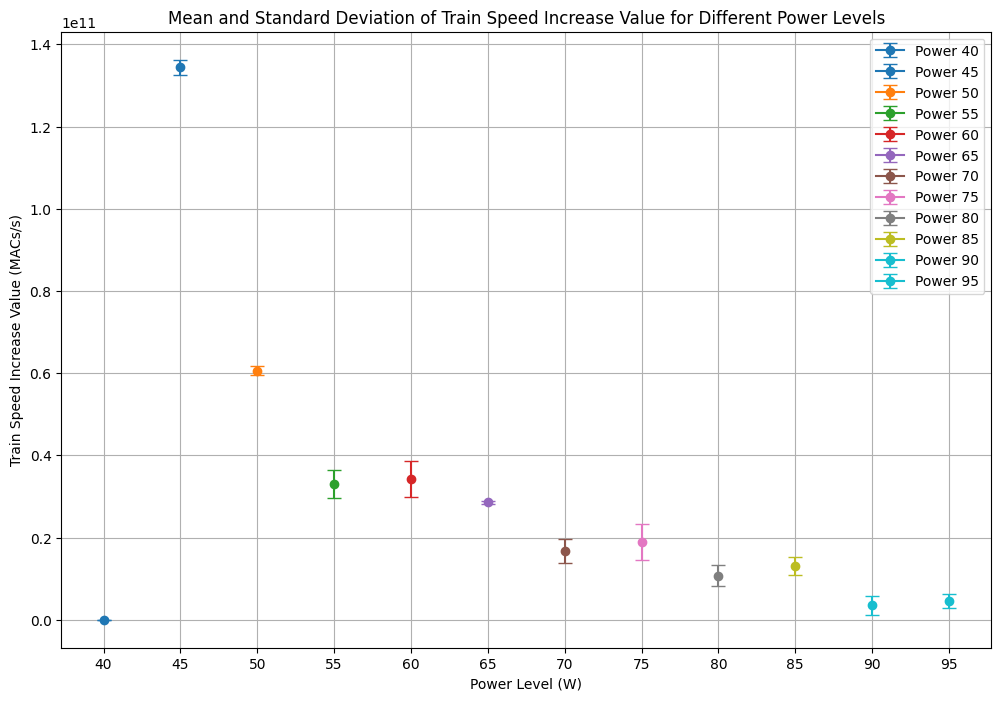

In [94]:
import numpy as np

import matplotlib.pyplot as plt

# Calculate the mean and standard deviation of TrainSpeedIncreaseValue for each epoch
mean_train_speed_increase_values = np.mean(TrainSpeedIncreaseValue, axis=0)
std_train_speed_increase_values = np.std(TrainSpeedIncreaseValue, axis=0)

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Define colors for each power level with higher contrast
colors = plt.cm.tab10(np.linspace(0, 1, len(power_levels)))

# Plot the mean and standard deviation of TrainSpeedIncreaseValue for each epoch
plt.figure(figsize=(12, 8))
for i, power_level in enumerate(power_levels):
    plt.errorbar(power_level, mean_train_speed_increase_values[i], yerr=std_train_speed_increase_values[i], fmt='o-', capsize=5, color=colors[i], label=f'Power {power_level}')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed Increase Value (MACs/s)')
plt.title('Mean and Standard Deviation of Train Speed Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()

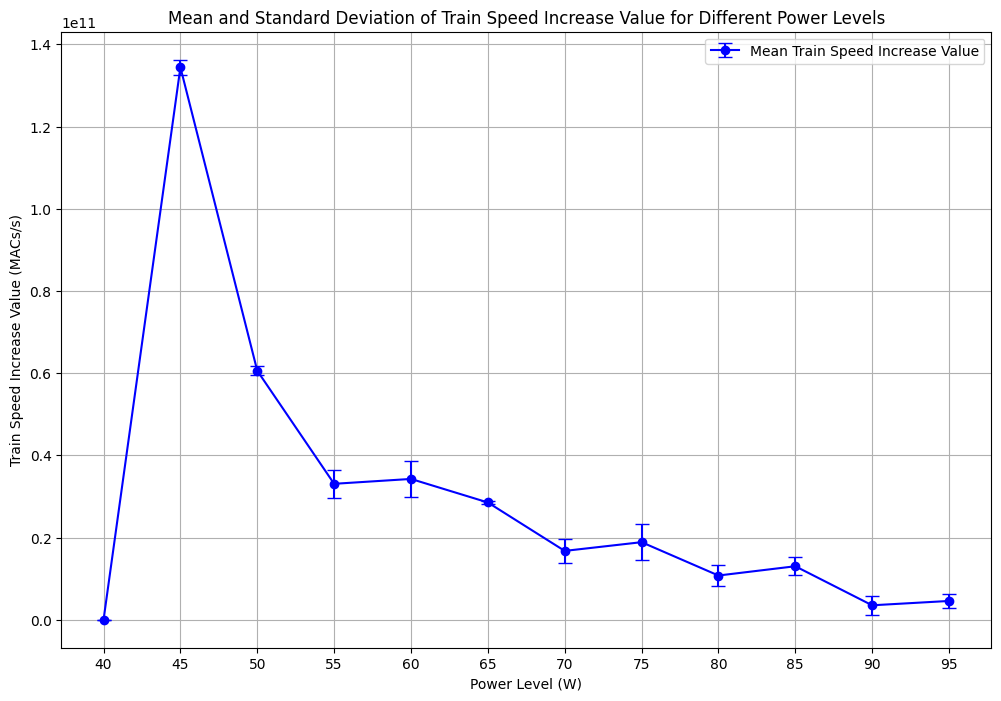

In [95]:
# Define the power levels and corresponding average train speed increase values
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Plot the mean and standard deviation of TrainSpeedIncreaseValue for each epoch using a single color and line graph
plt.figure(figsize=(12, 8))
plt.errorbar(power_levels, mean_train_speed_increase_values, yerr=std_train_speed_increase_values, fmt='o-', capsize=5, color='b', label='Mean Train Speed Increase Value')

# Add labels and title
plt.xlabel('Power Level (W)')
plt.ylabel('Train Speed Increase Value (MACs/s)')
plt.title('Mean and Standard Deviation of Train Speed Increase Value for Different Power Levels')
plt.grid(True)
plt.legend()

# Set x-axis ticks to be more clear with each block being 5
plt.xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

plt.show()


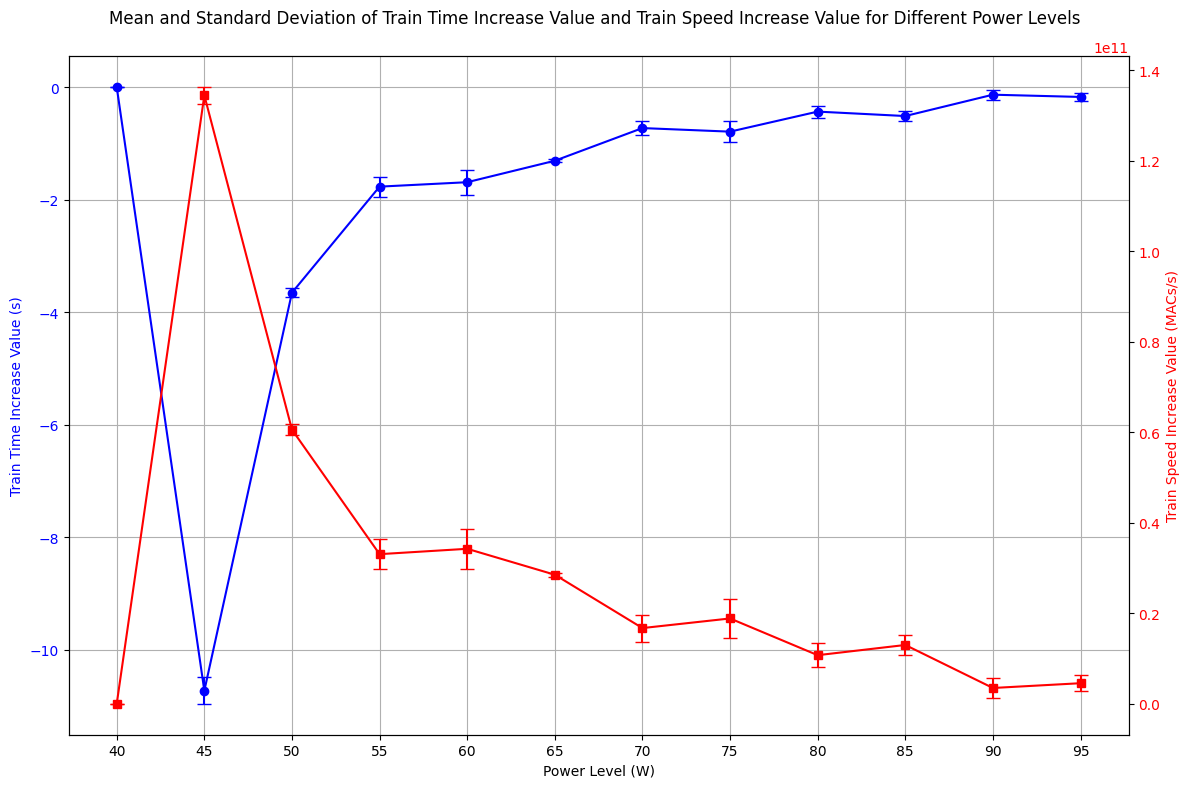

In [96]:
import numpy as np

import matplotlib.pyplot as plt

# Define the power levels
power_levels = [40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]

# Calculate the mean and standard deviation of TrainTimeIncreaseValue for each epoch
mean_increase_values = np.mean(TrainTimeIncreaseValue, axis=0)
std_increase_values = np.std(TrainTimeIncreaseValue, axis=0)

# Calculate the mean and standard deviation of TrainSpeedIncreaseValue for each epoch
mean_train_speed_increase_values = np.mean(TrainSpeedIncreaseValue, axis=0)
std_train_speed_increase_values = np.std(TrainSpeedIncreaseValue, axis=0)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the mean and standard deviation of TrainTimeIncreaseValue
ax1.errorbar(power_levels, mean_increase_values, yerr=std_increase_values, fmt='o-', capsize=5, color='b', label='Mean Train Time Increase Value')
ax1.set_xlabel('Power Level (W)')
ax1.set_ylabel('Train Time Increase Value (s)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis to plot TrainSpeedIncreaseValue
ax2 = ax1.twinx()
ax2.errorbar(power_levels, mean_train_speed_increase_values, yerr=std_train_speed_increase_values, fmt='s-', capsize=5, color='r', label='Mean Train Speed Increase Value')
ax2.set_ylabel('Train Speed Increase Value (MACs/s)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and show the plot
fig.suptitle('Mean and Standard Deviation of Train Time Increase Value and Train Speed Increase Value for Different Power Levels')
fig.tight_layout()

# Set x-axis ticks to be more clear with each block being 5
ax1.set_xticks(np.arange(min(power_levels), max(power_levels) + 1, 5))

# Add grid
ax1.grid(True)

plt.show()